In [1]:
import dabench
from dabench import data, vector, observer
import matplotlib.pyplot as plt
import numpy as np

# 1. Basic stationary observer with random sampling

The first step is to define a data generator and generate/load data for the observer. Let's use a Lorenz63 generator as a basic starting point.

In [2]:
l63 = data.Lorenz63()
l63.generate(n_steps=50)

In [3]:
# Now we can define the observer:
obs_l63 = observer.Observer(
    l63, # Data generator object
    random_time_density = 0.5, # Probability of picking each time step for random sampling
    random_location_density = 0.5, # Probability of picking each location in l63.system_dim for random sampling
    error_bias = 0.0, # Mean for observation error, Gaussian/Normal distribution
    error_sd = 0.7, # Standard deviation for observation error, Gaussian/Normal distribution
    random_seed=99 # We can specify a random seed. Default is 99
)

# Making observations
obs_vec_l63 = obs_l63.observe()

In [4]:
# Let's examine that object
print('Sampling times: ', obs_vec_l63.times)
print('Number of observations: ', obs_vec_l63.num_obs)
# In this case, the entire system (3 values) was sampled at the specific timesteps
print('Number of locations at each timestep: ', obs_vec_l63.obs_dims[0])
print('Sampling location indices: ', obs_vec_l63.location_indices[0])
print('Observation values: ', obs_vec_l63.values)

Sampling times:  [0.   0.01 0.02 0.03 0.04 0.05 0.07 0.09 0.1  0.16 0.18 0.21 0.23 0.25
 0.26 0.27 0.28 0.29 0.36 0.38 0.39 0.42 0.43 0.44 0.45 0.47 0.48 0.49]
Number of observations:  28
Number of locations at each timestep:  3
Sampling location indices:  [0 1 2]
Observation values:  [[-10.29022197 -14.6652297   21.78198057]
 [-10.70399386 -15.24221402  21.87497261]
 [-11.35904424 -17.23021486  22.53883631]
 [-11.94659792 -16.10440395  25.58918839]
 [-11.74365243 -16.28802967  26.00359406]
 [-13.33628773 -16.34826026  26.43800747]
 [-13.45765277 -14.53854516  30.95593871]
 [-12.80723448 -14.49595056  32.4815263 ]
 [-14.26203443 -14.97513421  33.45559562]
 [-12.58742529  -8.20804043  36.26860501]
 [-11.29188031  -5.47033628  35.43688139]
 [ -9.42099598  -4.06926917  35.34409017]
 [ -7.13261922  -2.89185662  33.44526588]
 [ -7.17752302  -1.32958925  31.7263288 ]
 [ -5.64147063  -0.78547612  30.32628849]
 [ -5.90705086  -1.01474939  29.62792521]
 [ -5.3421583   -0.90483986  30.39700041]


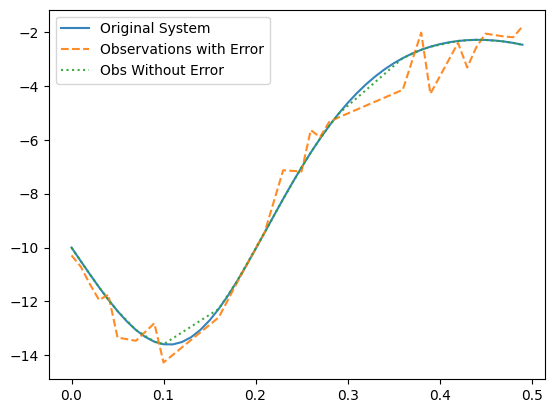

In [5]:
# Let's examine how error is added to observations
fig, ax = plt.subplots()
ax.plot(l63.times, l63.values[:, 0], alpha=0.9)
ax.plot(obs_vec_l63.times, obs_vec_l63.values[:, 0], '--', alpha=0.9)
obs_values_minus_error = obs_vec_l63.values - obs_vec_l63.errors
ax.plot(obs_vec_l63.times, obs_values_minus_error[:, 0], ':', alpha=0.9)
ax.legend(labels=['Original System', 'Observations with Error', 'Obs Without Error'])
plt.show()

# 2. Stationary observer with user-specified sampling times and locations

Last time, we let the observer randomly select locations and times to sample. But the observer also allows us to specify the location and time indices we want to observe. Let's explore that using a Lorenz96 generator.

In [6]:
l96 = data.Lorenz96()
l96.generate(n_steps=100)
print('Time dim: ', l96.time_dim)
print('System dim: ', l96.system_dim)

Time dim:  100
System dim:  36


In [7]:
# Let's sample 5 different points in the system every 5th timestep
time_inds_l96 = np.arange(0, 100, 5)
print(time_inds_l96)
sys_inds_l96 = [5, 10, 20, 25, 35]

[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


In [8]:
# Set up observer using our specified sampling times/locations
obs_l96 = observer.Observer(
    l96, 
    time_indices = time_inds_l96, # Time indices to sample
    location_indices = sys_inds_l96, # Location indices to sample
    error_bias = 0.2,
    error_sd = 0.5 
)

# Making observations
obs_vec_l96 = obs_l96.observe()

In [9]:
# Let's examine that object
print('Sampling times: ', obs_vec_l96.times)
print('Number of observations: ', obs_vec_l96.num_obs)
print('Number of locations at each timestep: ', obs_vec_l96.obs_dims[0])
print('Sampling location indices: ', obs_vec_l96.location_indices[0])
print('Observation values: ', obs_vec_l96.values)
print('Mean Error: ', obs_vec_l96.errors.mean()) # Pretty close to the 0.2 we specified

Sampling times:  [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75]
Number of observations:  20
Number of locations at each timestep:  5
Sampling location indices:  [ 5 10 20 25 35]
Observation values:  [[-2.04938935  2.47725879  0.59325828  2.18193221 -3.03160065]
 [-0.03638425  4.93167001  6.7015676   1.04932555  0.44471019]
 [ 0.47293418  3.39324919  7.63980548  5.00867157  4.32050446]
 [ 2.65925269  4.58264583  4.15880751  2.27910639  6.29407341]
 [ 6.37575185  4.51183119 -1.11072222 -3.95222748  6.61628667]
 [ 1.45459697  1.94398097 -1.32837318  1.35165833  1.82872983]
 [-0.34286475  4.41978587  0.37919729  2.84734961 -0.09454621]
 [ 1.62970512  5.98047862  3.64155235  1.92799158  2.38752044]
 [ 5.14729121 -1.20996717  6.402633    5.81342484  3.82966525]
 [ 6.59022196 -0.33427234  4.81476949  7.73738948  6.46179164]
 [ 6.71402318 -0.08630652  0.26178953  4.66546028  6.85299783]
 [ 1.72990425 -2.07068951  2.15502987 -4.87394136  4

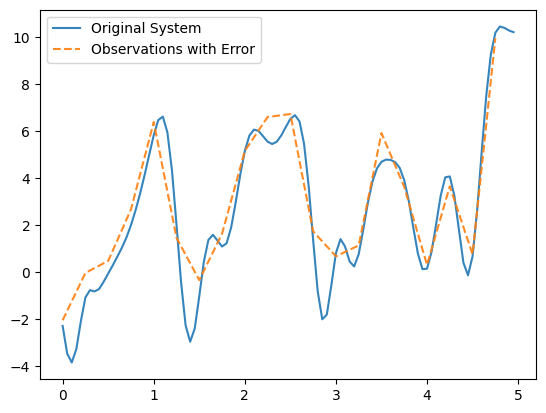

In [10]:
# Plot it against the original values
fig, ax = plt.subplots()
ax.plot(l96.times, l96.values[:, obs_vec_l96.location_indices[0, 0]], alpha=0.9)
ax.plot(obs_vec_l96.times, obs_vec_l96.values[:, 0], '--', alpha=0.9)
ax.legend(labels=['Original System', 'Observations with Error'])
plt.show()

# 3. Filtering observations by time

In some cases, once we've generated observations we might want to select all observations within a certiain time interval. Let's use the Lorenz96 observations we generated to show an example of this.

In [11]:
# Specify time interval, centered at 2 +/- 0.75
time_start = 2 - 0.75
time_end = 2 + 0.75
# Run filter and save as new obs vec
obs_vec_l96_filt = obs_vec_l96.filter_times(start=time_start, end=time_end, inclusive=True)
print('Observation times: ', obs_vec_l96_filt.times)
print('New number of obs: ', obs_vec_l96_filt.num_obs)

Observation times:  [1.25 1.5  1.75 2.   2.25 2.5  2.75]
New number of obs:  7


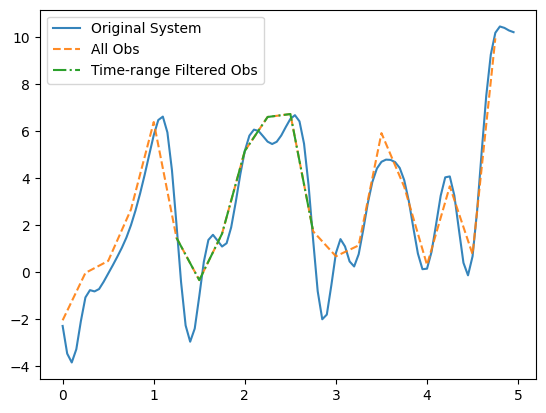

In [12]:
# Visualize
# Plot it against the original values
fig, ax = plt.subplots()
ax.plot(l96.times, l96.values[:, obs_vec_l96.location_indices[0, 0]], alpha=0.9)
ax.plot(obs_vec_l96.times, obs_vec_l96.values[:, 0], '--', alpha=0.9)
ax.plot(obs_vec_l96_filt.times, obs_vec_l96_filt.values[:, 0], '-.', alpha=1.0)
ax.legend(labels=['Original System', 'All Obs', 'Time-range Filtered Obs'])
plt.show()

# 4. Observer with locations in original coordinate dimensions

NOTE: These are currently not working

In the previous example, we specified locations to sample in the flattened, 1D space of the system's state vector. But for many data generators/loaders, the values originally exist in multi-dimensional space (e.g. latitudue, longitude, vertical level) before being flattened into a state vector. DataAssimBench's Observer class can take location indices in this original_dim instead. Let's create observations from some ERA5 data downloaded from Amazon Web Services. 

In [15]:
aws = data.AWS()
aws.load()
print('Time dim: ', aws.time_dim)
print('System dim: ',aws.system_dim)
print('Original dim: ', aws.original_dim)

ClientResponseError: 403, message='Forbidden', url=URL('http://era5-pds.s3.amazonaws.com/zarr/2020/09/data/air_temperature_at_2_metres.zarr/.zmetadata')

In [ ]:
# Let's sample every 500 timesteps
time_inds_aws = np.arange(0, aws.time_dim, 500)
# Let's pick indices at the corners and roughly center of the system
loc_inds_aws= np.array([[0, 0], [12, 0], [12, 42], [0, 42], [6, 21]])

In [ ]:
# Set up observer using our specified sampling times/locations
obs_aws = observer.Observer(
    aws, 
    time_indices = time_inds_aws, # Time indices to sample
    location_indices = loc_inds_aws, # Location indices to sample
    error_bias = 0.0, # No error this time
    error_sd = 0.0
)

# Making observations
obs_vec_aws = obs_aws.observe()

In [16]:
# Let's examine that object
print('Sampling times: ', obs_vec_aws.times)
print('Number of observations: ', obs_vec_aws.num_obs)
print('Number of locations at each timestep: ', obs_vec_aws.obs_dims[0])
print('Sampling location indices: ', obs_vec_aws.location_indices[0])
print('Observation values: ', obs_vec_aws.values)
print('Errors: ', obs_vec_aws.errors)

NameError: name 'obs_vec_aws' is not defined

In [ ]:
# Visualize
# Recall that there is no error, but our sampling is pretty infrequent compared to the actual system
# Plot it against the original values
fig, ax = plt.subplots()
ax.plot(aws.times, aws.values_gridded[:, 0, 0], alpha=0.7)
ax.plot(obs_vec_aws.times, obs_vec_aws.values[:, 0], '--', alpha=1.0)
ax.legend(labels=['Original System', 'Observations'])
plt.show()

In [ ]:
# Even though these times are datetimes, we can filter our observations by time
# by using np.datetime objects.
# Let's get all observations between June 1st and September 1st:
time_start = np.datetime64('2020-06-01')
time_end = np.datetime64('2020-09-01')
# Run filter and save as new obs vec
obs_vec_aws_filt = obs_vec_aws.filter_times(start=time_start, end=time_end, inclusive=True)
print('Observation times: ', obs_vec_aws_filt.times)
print('New number of obs: ', obs_vec_aws_filt.num_obs)

# 5. Non-Stationary Observer

NOTE: These are currently not working

In most cases, it's simplest to assume the observers are stationary and that we are sampling at the same location at each timestep. However, Observer allows for non-stationary observers as well, sampling different locations over time. We'll create a new set of observations from the AWS data as an example.

In [ ]:
# Set up observer using our specified sampling times/locations
obs_aws_ns = observer.Observer(
    aws, 
    time_density = 0.002,
    location_density = 0.05,
    error_bias = 0.0,
    error_sd = 3.0,
    stationary_observers=False
)

# Making observations
obs_vec_aws_ns = obs_aws_ns.observe()

In [ ]:
print('Sampling times: ', obs_vec_aws_ns.times)
print('Number of observations: ', obs_vec_aws_ns.num_obs)
print('Number of locations at each timestep: ', obs_vec_aws_ns.obs_dims)
print('Sampling location indices at first timestep: ', obs_vec_aws_ns.location_indices[0])
print('Sampling location indices at last timestep: ', obs_vec_aws_ns.location_indices[-1])
